# Tarea 3. Sistemas de ecuaciones lineales.


## 1. Solución de sistemas de ecuaciones. 

Resolvemos los sistemas de ecuaciones para comparar con la solución a mano. Los resultados se encuentran en los cuadros 1 y 2 del reporte. 

In [1]:
import numpy as np
from IPython.display import Image

a1= np.array([[0.0001,-0.6,4],[-0.2,-2,4],[1.5,3.2,6]])
b1= np.array([18,22,73])
x1= np.linalg.solve(a1, b1)
print(x1)

a2= np.array([[0.003,0.08,1.5],[6,-0.0002,2.3],[2.5,0.0001,4]])
b2= np.array([-22,18,8])
x2= np.linalg.solve(a2, b2)
print(x2)


[ 63.15559099 -11.88388125   2.71583892]
[ 2.92126785e+00 -2.78506490e+02  1.81170254e-01]


In [2]:
100*((63.15559099 -61) / 63.15559099)


3.4131435652962456

## 2. Implementar el algoritmo de Crout para obtener las matrices U y L. 


In [3]:
# (2) Algoritmo de Crout:
import numpy as np

def crout(A):
    
    n = A.shape[0]   #n es el número de filas de A
    
    U = np.zeros((n, n), dtype=np.double)   #Inicializa  U 
    #L = np.zeros((n, n), dtype=np.double)
    L = np.eye(n, dtype=np.double)          #Inicializa L como la identidad
    #print('L=\n', L)
    #print('U=\n', U)
   
    #Loop sobre las filas
    for k in range(n):
        
        L[k, k] = A[k, k] - L[k, :] @ U[:, k]
        #print('L=\n', L)  #las iteraciones.
        #print('U=\n', U)
        U[k, k:] = (A[k, k:] - L[k, :k] @ U[:k, k:]) / L[k, k]
        L[(k+1):, k] = (A[(k+1):, k] - L[(k+1):, :] @ U[:, k]) / U[k, k]
        
    #print('\n\nA = LU = \n',L @ U) #Recuperamos la matriz original. 

    return L, U
# test
#A = np.array([[60.0, 30.0, 20.0], [30.0, 20.0, 15.0], [20.0, 15.0, 12.0]])
#L,U = crout(A)
#print('L=\n', L)
#print('U=\n', U)

In [4]:
#
A = np.array([[-6., 3., -4., -3], [4., -7., -3., 2], [6., -8., 4, 4], [7., -1., 3., -1]])
L,U = crout(A)
print('L=\n', L)
print('U=\n', U)

L=
 [[-6.          0.          0.          0.        ]
 [ 4.         -5.          0.          0.        ]
 [ 6.         -5.          5.66666667  0.        ]
 [ 7.          2.5        -4.5        -3.70588235]]
U=
 [[ 1.         -0.5         0.66666667  0.5       ]
 [ 0.          1.          1.13333333 -0.        ]
 [ 0.          0.          1.          0.17647059]
 [ 0.          0.          0.          1.        ]]


## Usar las matrices L y U calculadas anteriormente para resolver sistemas de ecuaciones $Ax=b$.

In [5]:
def sustitucion_adelante(L,b):
    #número de filas
    n = L.shape[0]
    
    #inicializamos solución
    y = np.zeros_like(b,dtype=np.double)  #Return an array of zeros with the same shape and type as a given array.
    
    #Sustitución hacia adelante,  
    #inicia con la primer fila:
    y[0] = b[0] / L[0, 0]
    
    #loop sobre las filas en reversa (de abajo hacia arriba),
    #iniciando con la penúltima fila, la primera se hizo en el paso anterior.
    for i in range(1, n):
        y[i] = (b[i] - np.dot(L[i,:i], y[:i])) / L[i,i]
        
    return y 

In [6]:
def sustitucion_atras(U,y):
    
    #número de filas
    n = U.shape[0]
    
    #inicializamos solución
    x = np.zeros_like(y, dtype=np.double)

    #sustitución hacia atrás,  
    #inicia con la última fila
    x[-1] = y[-1] / U[-1, -1]
    
    #loop sobre las filas en reversa (de abajo hacia arriba),
    #iniciando con la penúltima fila, la primera se hizo en el paso anterior.
    for i in range(n-2, -1, -1):
        x[i] = (y[i] - np.dot(U[i,i:], x[i:])) / U[i,i]
        
    return x

    

In [7]:
def lu_sol(A,b):

    L,U = crout(A)
    
    y = sustitucion_adelante(L,b)
    
    return sustitucion_atras(U,y)


In [8]:
# resolviendo los sistemas de ecuaciones
b1 = np.array([[-35.],[10],[50],[25]])
b2 = np.array([[0.5],[1.25],[-2.],[2.]])
b3 = np.array([[-2.],[-32.],[-6.],[10.]])

#print('b1=\n',b1,'\nb2=\n',b2,'\nb3=\n',b3)
#print(b1.shape)

#A = np.array([[1, 4, 5], [6, 8, 22], [32, 5., 5]])
#b = np.array([1, 2, 3.])
#lu_solve(A, b)

A = np.array([[-6., 3., -4., -3], [4., -7., -3., 2], [6., -8., 4, 4], [7., -1., 3., -1]])

x1 = lu_sol(A, b1)
x2 = lu_sol(A, b2)
x3 = lu_sol(A, b3)

print('x_1=\n', x1, '\nx_2=\n', x2,'\nx_3=\n',x3)
x1.shape

x_1=
 [[ 1.0000000e+00]
 [-3.0000000e+00]
 [ 5.0000000e+00]
 [-9.5866877e-16]] 
x_2=
 [[ 0.5 ]
 [ 0.25]
 [-0.5 ]
 [-0.25]] 
x_3=
 [[-1.]
 [ 1.]
 [ 5.]
 [-3.]]


(4, 1)

In [9]:
#compara con np.linalg.solve
x1_np= np.linalg.solve(A, b1)
x2_np= np.linalg.solve(A, b2)
x3_np= np.linalg.solve(A, b3)
print('x_1=\n', x1_np, '\nx_2=\n', x2_np,'\nx_3=\n',x3_np)

x_1=
 [[ 1.00000000e+00]
 [-3.00000000e+00]
 [ 5.00000000e+00]
 [ 8.45884209e-16]] 
x_2=
 [[ 0.5 ]
 [ 0.25]
 [-0.5 ]
 [-0.25]] 
x_3=
 [[-1.]
 [ 1.]
 [ 5.]
 [-3.]]


## 3. Single Value Decomposition.

Hallar los valores y vectores propios de las matrices;

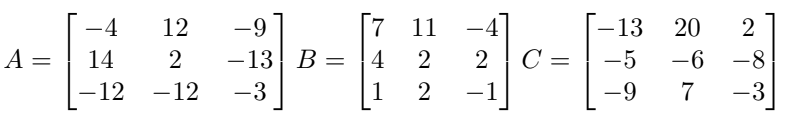

In [10]:
Image("/home/eva/Desktop/INAOE-2020/Computo_Estadistica/tarea-3/pb3.png")

In [11]:
import numpy as np
from numpy import linalg

A = np.array([[-4., 12., -9.], [14., 2., -13.], [-12., -12., -3.]])
B = np.array([[7., 11., -4.], [4., 2., 2.], [1., 2., -1]])
C = np.array([[-13., 20., 2.], [-5., -6., -8], [-9, 7, -3]])

w,v = np.linalg.eig(A)
print('\nA\n')
print('w=\n',w,'\n')
print('v=\n',v,'\n')
print(w.shape)
print(v.shape)

w,v = np.linalg.eig(B)
print('\nB\n')
print('w=\n',w,'\n')
print('v=\n',v,'\n')
print(w.shape)
print(v.shape)

w,v = np.linalg.eig(C)
print('w=\n',w,'\n')
print('v=\n',v,'\n')
print(w.shape)
print(v.shape)

#print('\n')
#print(A)
#print(B)
#print(C)


A

w=
 [ 22.62369824+0.j         -13.81184912+0.42782829j
 -13.81184912-0.42782829j] 

v=
 [[-0.49062573+0.j         -0.56510712+0.25573432j -0.56510712-0.25573432j]
 [-0.67804264+0.j         -0.10420029-0.22924962j -0.10420029+0.22924962j]
 [ 0.54730665+0.j         -0.74285988+0.j         -0.74285988-0.j        ]] 

(3,)
(3, 3)

B

w=
 [ 1.14161985e+01  3.13666465e-16 -3.41619849e+00] 

v=
 [[-0.900516   -0.57735027  0.74693602]
 [-0.41204124  0.57735027 -0.63006009]
 [-0.13889907  0.57735027  0.21239321]] 

(3,)
(3, 3)
w=
 [-1.10000000e+01+13.7113092j -1.10000000e+01-13.7113092j
 -5.89790879e-16 +0.j       ] 

v=
 [[-0.74339194+0.j         -0.74339194-0.j         -0.57355725+0.j        ]
 [-0.03539962-0.48537508j -0.03539962+0.48537508j -0.4417941 +0.j        ]
 [-0.38939578-0.24268754j -0.38939578+0.24268754j  0.68981886+0.j        ]] 

(3,)
(3, 3)


### Descomponer las matrices A y B en sus valores singulares (SVD, Single Value Decomposition) y calcular su rango.

In [12]:
print('SVD de A\n')
U_A, s_A, VT_A = np.linalg.svd(A)
print('U\n',U_A)
print('s\n',s_A)
print('VT\n',VT_A)


print('\nSVD de B\n')
U_B, s_B, VT_B = np.linalg.svd(B)
print('U\n',U_B)
print('s\n',s_B)
print('VT\n',VT_B)

SVD de A

U
 [[ 0.35270175 -0.93448069  0.04844919]
 [ 0.73272443  0.30801448  0.60682946]
 [-0.58199347 -0.1785299   0.79335407]]
s
 [23.05300889 14.13509345 13.25737207]
VT
 [[ 0.68673277  0.55011437 -0.47515502]
 [ 0.72107654 -0.59818355  0.349607  ]
 [-0.09190608 -0.58270972 -0.80746681]]

SVD de B

U
 [[-0.95807286  0.20976452 -0.19518001]
 [-0.23178824 -0.96785867  0.09759001]
 [-0.16843575  0.13873877  0.97590007]]
s
 [1.42113602e+01 3.74663068e+00 3.86747134e-17]
VT
 [[-0.54900436 -0.79790036  0.248896  ]
 [-0.60436816  0.17326764 -0.77763581]
 [-0.57735027  0.57735027  0.57735027]]


#### Podemos hallar el rango de una matriz usando el número de sus valores singulares no-nulos.

In [13]:
#
def rango(A, eps=1e-12):               #Lo que sea menor a 1e-12 es cero. 
    u, s, vh = np.linalg.svd(A) 
    return len([x for x in s if abs(x) > eps])  #contamos cuantos valores singulares son != 0.

#print(A,B,C)
R_A = rango(A)
print('rango A =',R_A)
R_B = rango(B)
print('rango B =',R_B)
R_C = rango(C)
print('rango C =',R_C)
#print('\n', A)

#test
D = ([[1,0,1,1],[-1,2,3,2],[0,2,4,3]])
R_D = rango(D)
print('rango D =',R_D)

rango A = 3
rango B = 2
rango C = 2
rango D = 2


## 4. Métodos iterativos para resolver sistemas de ecuaciones lineales.


In [14]:

def itsol(A, b, guess=None, maxit=100,  eps=1e-6):
    
    x = [1.0, 1.0, 1.0]
    D = np.diag(A)               
    R = A - np.diagflat(D)
    #print(np.shape(D), np.shape(R))
    
    for i in range(maxit):
        x = (b - np.dot(R,x))/ D
        #print('x',x,'b', b,'R', R, 'D',D)
    return x

#################################

A = np.array([[4.0, -2.0, 1.0], [1.0, -3.0, 2.0], [-1.0, 2.0, 6.0]])
b = [1.0, 2.0, 3.0]


print (np.linalg.solve(A, b)) #para comparar con numpy
Sol=itsol(A, b)
print(Sol)

[-0.04109589 -0.28767123  0.5890411 ]
[-0.04109589 -0.28767123  0.5890411 ]


### 5. Ajuste polinomial mediante el cálculo de la pseudo-inversa.
Solución para sistemas sobredeterminados. Aplicar esta técnica para los datos del archivo 3c279_sma.csv 

Ajuste los polinomios de grado 3,5 y 8. Graficar todo junto.

Como primera aproximación escribi el método para N=3 y pocos puntos. Se utiliza para ajustar puntos a una función $y=x^3$, y se compara con puntos obtenidos de la forma analítica de la función.

A [[-27.   9.  -3.   1.]
 [ -1.   1.  -1.   1.]
 [ -8.   4.  -2.   1.]
 [  1.   1.   1.   1.]
 [  0.   0.   0.   1.]
 [  8.   4.   2.   1.]]
A_p [[-0.0462963   0.03703704  0.06481481 -0.06481481 -0.03703704  0.0462963 ]
 [ 0.01984127 -0.01587302  0.07936508 -0.11507937 -0.12698413  0.15873016]
 [ 0.14550265 -0.25925926 -0.38227513  0.34656085  0.11640212  0.03306878]
 [-0.03174603  0.25396825  0.01587302  0.41269841  0.46031746 -0.11111111]]
coef [ 1.00000000e+00  0.00000000e+00 -6.10622664e-16  0.00000000e+00]


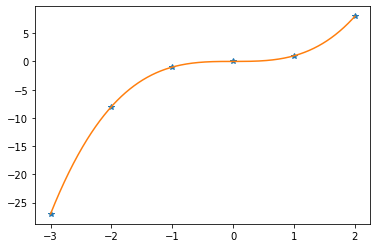

In [24]:
#Ajuste primera aproximación N=3
import numpy as np
from numpy import linalg
import matplotlib.pyplot as pl


x = np.array([-3,-1,-2,1,0,2])
y = x**3

# A = np.array([[-3, 1], [-1, 1], [-2, 1], [1, 1], [0, 1], [2, 1]])
# b = np.array([[-3], [-1], [-2], [1], [0], [2]])
A=np.ones((6,4))
A[:,0]= x**3
A[:,1]= x**2
A[:,2]= x

# print A

# A = np.array([[9,-3, 1], [1,-1, 1], [4,-2, 1], [1,1, 1], [0,0, 1], [2,2, 1]])

A_plus = np.linalg.pinv(A)
coefs = np.dot(A_plus,y)

print ('A',A)
print ('A_p',A_plus)
print ('coef',coefs)


xp = np.linspace(min(x), max(x), 1000)
yp = coefs[0]*xp**3 + coefs[1]*xp**2 + coefs[2]*xp + coefs[3]

pl.plot(x, y, '*')
pl.plot(xp, yp)


En la gráfica anterior se comprueba que el método de ajuste mediante la matriz pseudo-inversa funciona bien. 
Ahora usamos el método para ajustar los puntos de las mediciones de flujo del cuásar 3c279.

In [26]:
################## Aqui solo leo el archivo y transformo a MJD ###############

import numpy as np
from astropy.time import Time
import pandas as panda
import calendar
print('2. Cuásar 3c279')
print('(a)Transforma las columnas de Día, Mes y Año a días julianos (JD)\n')
f = panda.read_csv("3c279_sma.csv")
#print (f.keys())

# Reescribir usando número en vez del nombre del mes
d = dict((v,k) for v,k in zip(calendar.month_abbr[1:], range(1, 13)))
f.MONTH = f.MONTH.map(d)
#print(f.MONTH)

# Columna nueva en el formato de Time:
cols = ['YEAR', 'MONTH', 'DAY']
newcol = ['-'.join(i) for i in f[cols].astype(str).values]
f_new = f.assign(DATE=newcol) #.drop(cols,1) 
fecha = np.asarray(f_new.DATE)
g = fecha.tolist()

# convierte a JD y MJD
t = Time(g, format='iso')
t.format = 'jd'
jd = np.asarray(t.value)
t.format = 'mjd'
#######################################################
#Leo el archivo y lo guardo en arreglos x,y
x =  np.asarray(t.value)     # son las fechas en mjd
print(np.shape(x))
y = np.asarray(f['FLUX'])  
print(np.shape(y))   #necesito un vector columna para y
type(y)

#print(np.shape(y))

2. Cuásar 3c279
(a)Transforma las columnas de Día, Mes y Año a días julianos (JD)

(462,)
(462,)


numpy.ndarray

(462,)
(462, 3)
[[3.04726080e+09 5.52020000e+04 1.00000000e+00]
 [3.04737121e+09 5.52030000e+04 1.00000000e+00]
 [3.04748162e+09 5.52040000e+04 1.00000000e+00]
 ...
 [3.46708992e+09 5.88820000e+04 1.00000000e+00]
 [3.46956341e+09 5.89030000e+04 1.00000000e+00]
 [3.47144856e+09 5.89190000e+04 1.00000000e+00]]
coef [-3.98538468e-07  4.35121506e-02 -1.17464810e+03]


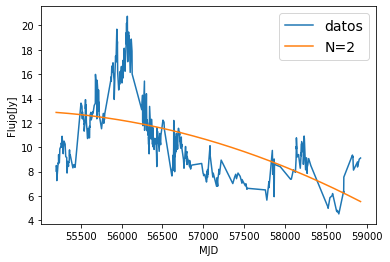

In [27]:
########## N= 2 ##########
B=np.ones((462,3))
print(np.shape(x))
print (np.shape(B))
B[:,1] = x
B[:,0] = x**2
print (B)

B_plus = np.linalg.pinv(B) 
#print(B_plus)

#los coeficientes del polinomio se encuentran con:
# 'y' es el vector solución
coef = B_plus.dot(y)
print('coef',coef)

tt=np.linspace(np.min(x),np.max(x), 10000)
P =coef[0]*tt**2 + coef[1]*tt + coef[2]

plt.plot(B[:,1],y, '-', label="datos")
plt.plot(tt,P,label='N=2')
plt.xlabel('MJD')
plt.ylabel('Flujo[Jy]')
plt.legend(loc='upper right', fontsize='14')
plt.savefig("spectre.png")

plt.show()



E [[1.68214891e+14 3.04726080e+09 5.52020000e+04 1.00000000e+00]
 [1.68224033e+14 3.04737121e+09 5.52030000e+04 1.00000000e+00]
 [1.68233175e+14 3.04748162e+09 5.52040000e+04 1.00000000e+00]
 ...
 [2.04149189e+14 3.46708992e+09 5.88820000e+04 1.00000000e+00]
 [2.04367693e+14 3.46956341e+09 5.89030000e+04 1.00000000e+00]
 [2.04534278e+14 3.47144856e+09 5.89190000e+04 1.00000000e+00]]
E_p [[ 7.52949434e-14  7.51615362e-14  7.50282020e-14 ...  1.14963252e-13
   1.18438976e-13  1.21113453e-13]
 [-8.62817434e-09 -8.61294590e-09 -8.59772578e-09 ... -1.29914884e-08
  -1.33862962e-08 -1.36900968e-08]
 [ 2.47108123e-04  2.46673699e-04  2.46239512e-04 ...  3.66959320e-04
   3.78167492e-04  3.86792255e-04]
 [ 1.30327921e-08  1.30098800e-08  1.29869804e-08 ...  1.93538944e-08
   1.99450274e-08  2.03999082e-08]]
coeficientes [-5.92502240e-12  6.38748510e-07 -1.69710818e-02 -8.95076121e-07]


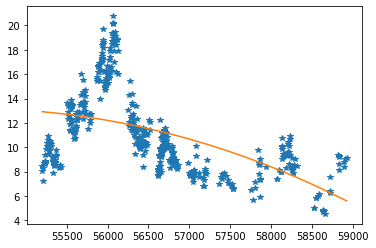

In [28]:
##   N=3
# A = np.array([[-3, 1], [-1, 1], [-2, 1], [1, 1], [0, 1], [2, 1]])
# b = np.array([[-3], [-1], [-2], [1], [0], [2]])
E=np.ones((462,4))

E[:,0]= x**3
E[:,1]= x**2
E[:,2]= x

#print (A)

# A = np.array([[9,-3, 1], [1,-1, 1], [4,-2, 1], [1,1, 1], [0,0, 1], [2,2, 1]])

E_plus = np.linalg.pinv(E)
cs = np.dot(E_plus,y)

print ('E',E)
print ('E_p',E_plus)
print ('coeficientes',cs)


xp = np.linspace(min(x), max(x), 1000)
yp = cs[0]*xp**3 + cs[1]*xp**2 + cs[2]*xp + cs[3]

pl.plot(x, y, '*')
pl.plot(xp, yp)




Aqui comencé a sospechar que hay algo raro. Por mas que he aumentado el grado del polinomio no he logrado ver un mejor ajuste que los que ya he presentado.

In [16]:
#  N=8
#Abrir el archivo, guardar en (x,y)
#Para el ajuste A representa los valores de los coeficientes.
#Creamos la matriz A con los datos (x,y)
# y = b el vector de soluciones

#Para ajustar al polinomio de grado 8
A=np.ones((462,9))

#x = np.array([7,1,5,4])
#A=np.ones((4,9))
print(np.shape(x))
print (np.shape(A))
A[:,7] = x
A[:,6] = x**2
A[:,5] = x**3
A[:,4] = x**4
A[:,3] = x**5
A[:,2] = x**6
A[:,1] = x**7
A[:,0] = x**8

print (A)


(462,)
(462, 9)
[[8.62260521e+37 1.56200957e+33 2.82962495e+28 ... 3.04726080e+09
  5.52020000e+04 1.00000000e+00]
 [8.62385489e+37 1.56220765e+33 2.82993252e+28 ... 3.04737121e+09
  5.52030000e+04 1.00000000e+00]
 [8.62510474e+37 1.56240576e+33 2.83024012e+28 ... 3.04748162e+09
  5.52040000e+04 1.00000000e+00]
 ...
 [1.44497530e+38 2.45401872e+33 4.16768913e+28 ... 3.46708992e+09
  5.88820000e+04 1.00000000e+00]
 [1.44910320e+38 2.46015178e+33 4.17661541e+28 ... 3.46956341e+09
  5.89030000e+04 1.00000000e+00]
 [1.45225519e+38 2.46483340e+33 4.18342708e+28 ... 3.47144856e+09
  5.89190000e+04 1.00000000e+00]]


In [17]:
#Dada A creamos la pseudo-inversa:
def seudo(A):
    return np.linalg.inv(A.T.dot(A)).dot(A.T)

#A = np.array([[7, 2], [3, 4], [5, 3]]) 
#A_plus = seudo(A)

#checamos con 
A_plus = np.linalg.pinv(A) 
print(A_plus)


[[ 1.24092064e-37  1.23899557e-37  1.23707120e-37 ...  1.99073922e-37
   2.06109957e-37  2.11539965e-37]
 [-1.42344969e-32 -1.42125002e-32 -1.41905114e-32 ... -2.25313477e-32
  -2.33316349e-32 -2.39492655e-32]
 [ 4.08089941e-28  4.07461812e-28  4.06833910e-28 ...  6.37399569e-28
   6.60148766e-28  6.77706132e-28]
 ...
 [ 5.83237358e-46  5.82339643e-46  5.81442253e-46 ...  9.10963991e-46
   9.43476876e-46  9.68569657e-46]
 [ 1.43511145e-50  1.43290254e-50  1.43069443e-50 ...  2.24151426e-50
   2.32151533e-50  2.38325853e-50]
 [ 3.36357754e-55  3.35840035e-55  3.35322503e-55 ...  5.25360384e-55
   5.44110831e-55  5.58582042e-55]]


In [18]:
#los coeficientes del polinomio se encuentran con:
# y es el vector solución
coefs = A_plus.dot(y)
coefs

array([ 4.77383741e-37, -1.41619065e-31,  6.82856110e-27,  3.59833934e-31,
        1.26429702e-35,  3.70237223e-40,  9.75929945e-45,  2.40136922e-49,
        5.62826781e-54])

In [19]:
tt=np.linspace(np.min(x),np.max(x), 10000)

N8 = coefs[0]*tt**8 + coefs[1]*tt**7 + coefs[2]*tt**6 + coefs[3]*tt**5 \
    +coefs[4]*tt**4 + coefs[5]*tt**3 + coefs[6]*tt**2 +coefs[7]*tt**1 + coefs[8]

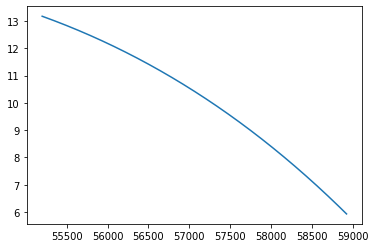

In [20]:
import cmasher as cmr
import matplotlib.pyplot as plt
import numpy as np

#plt.plot(x,y, '-', label="datos")
plt.plot(tt,N8, '-', label="N=8")
